In [16]:
import os
import glob
import cv2
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# [os.remove("GT/"+i) for i in os.listdir("GT") if "ignore" in i]

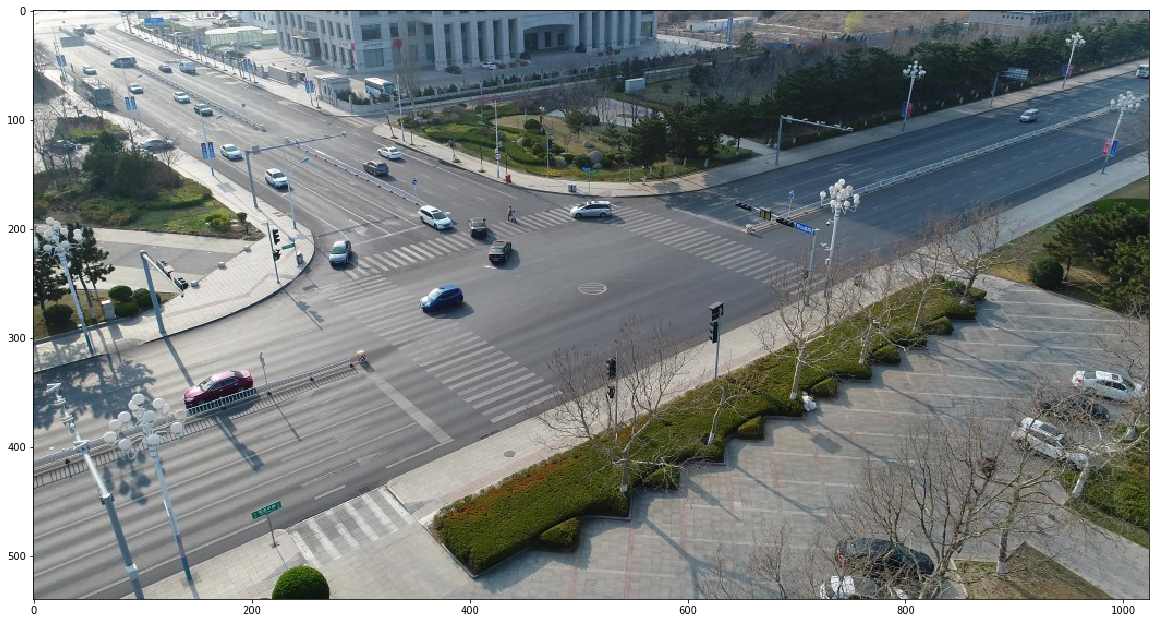

In [92]:
img_paths=glob.glob("UAV-benchmark-M/*/*")
img_path=np.random.choice(img_paths)
df=pd.read_csv("GT/{}_gt_whole.txt".format(img_path.split("/")[1]),header=None)
cols=["frame_index","target_id","bbox_left","bbox_top","bbox_width","bbox_height","out-of-view","occlusion","object_category"]
df.columns=cols
ind=int(img_path.split("/")[-1].split(".")[0].split("img")[1])
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,15))
plt.imshow(img)

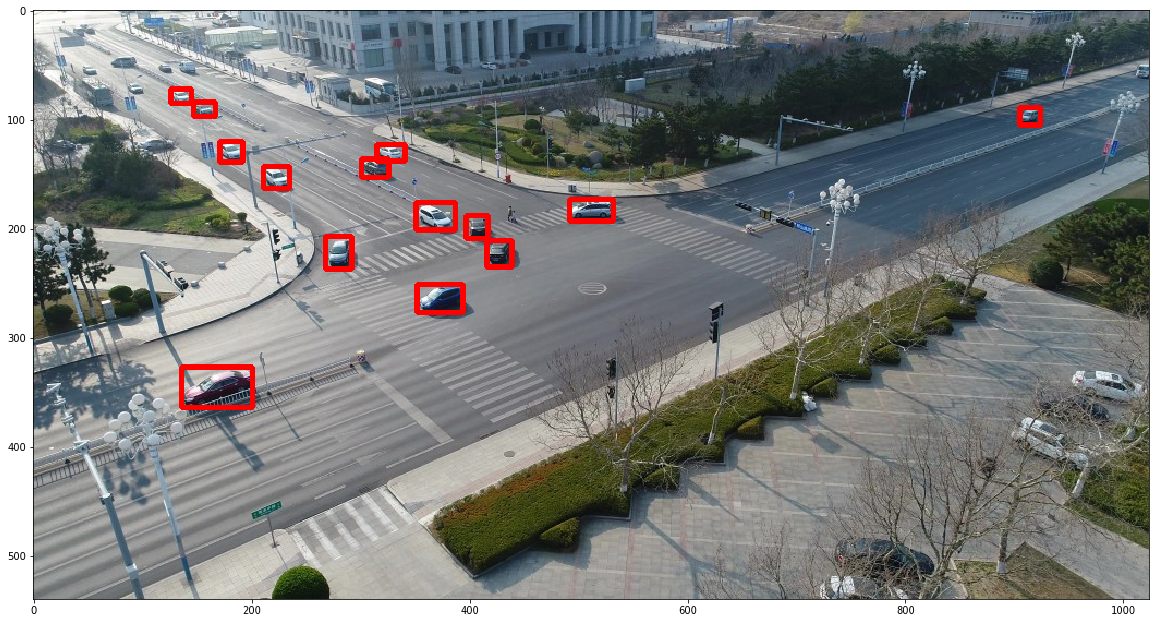

In [93]:
first=df.loc[df["frame_index"]==ind]
for row in first.values:
    cat=row[-1]
    colrs=[0,0,0]
    colrs[cat-1]=255
    colrs=tuple(colrs)
    cv2.rectangle(img,(row[2],row[3]),(row[2]+row[4],row[3]+row[5])
                  ,colrs
                  ,3)
plt.figure(figsize=(20,15))
plt.imshow(img)

In [79]:
txt_paths=glob.glob("GT/*_whole.txt")
txt_paths

['GT/M0801_gt_whole.txt',
 'GT/M0101_gt_whole.txt',
 'GT/M0902_gt_whole.txt',
 'GT/M1201_gt_whole.txt',
 'GT/M1304_gt_whole.txt',
 'GT/M0704_gt_whole.txt',
 'GT/M0602_gt_whole.txt',
 'GT/M0201_gt_whole.txt',
 'GT/M0205_gt_whole.txt',
 'GT/M0601_gt_whole.txt',
 'GT/M0209_gt_whole.txt',
 'GT/M0701_gt_whole.txt',
 'GT/M1001_gt_whole.txt',
 'GT/M0204_gt_whole.txt',
 'GT/M1005_gt_whole.txt',
 'GT/M0604_gt_whole.txt',
 'GT/M0207_gt_whole.txt',
 'GT/M0802_gt_whole.txt',
 'GT/M0301_gt_whole.txt',
 'GT/M1401_gt_whole.txt',
 'GT/M1002_gt_whole.txt',
 'GT/M1306_gt_whole.txt',
 'GT/M1202_gt_whole.txt',
 'GT/M1305_gt_whole.txt',
 'GT/M0203_gt_whole.txt',
 'GT/M0402_gt_whole.txt',
 'GT/M1101_gt_whole.txt',
 'GT/M0901_gt_whole.txt',
 'GT/M1006_gt_whole.txt',
 'GT/M1004_gt_whole.txt',
 'GT/M0501_gt_whole.txt',
 'GT/M0210_gt_whole.txt',
 'GT/M0605_gt_whole.txt',
 'GT/M1009_gt_whole.txt',
 'GT/M1302_gt_whole.txt',
 'GT/M1301_gt_whole.txt',
 'GT/M0401_gt_whole.txt',
 'GT/M0403_gt_whole.txt',
 'GT/M1003_g

In [81]:
gg=[]
for pat in txt_paths:
    df=pd.read_csv(pat,header=None)
    df.columns=cols
    gg.append(df)
df=pd.concat(gg)
df.head()

,frame_index,target_id,bbox_left,bbox_top,bbox_width,bbox_height,out-of-view,occlusion,object_category
0,107,1,488,490,55,47,1,1,1
1,108,1,491,482,53,53,1,1,1
2,109,1,494,474,52,59,1,1,1
3,110,1,498,466,50,65,1,1,1
4,111,1,500,459,50,65,1,1,1


In [82]:
df

,frame_index,target_id,bbox_left,bbox_top,bbox_width,bbox_height,out-of-view,occlusion,object_category
0,107,1,488,490,55,47,1,1,1
1,108,1,491,482,53,53,1,1,1
2,109,1,494,474,52,59,1,1,1
3,110,1,498,466,50,65,1,1,1
4,111,1,500,459,50,65,1,1,1
5,112,1,503,452,50,65,1,1,1
6,113,1,506,445,50,65,1,1,1
7,114,1,508,439,50,65,1,1,1
8,115,1,511,432,50,65,1,1,1
9,116,1,514,425,50,65,1,1,1


In [84]:
df["object_category"].value_counts()
# 1    755688
# 2     25086
# 3     18021
# Name: object_category, dtype: int64
# tasıt var sadece

1    755688
2     25086
3     18021
Name: object_category, dtype: int64

In [85]:
df["occlusion"].value_counts()

1    715470
4     64004
3     10025
2      9296
Name: occlusion, dtype: int64